## CFChemDb demo - cheminformatics db and development system
Jeremy Yang

Common Fund Data Ecosystem (CFDE)

* https://github.com/nih-cfde
* https://github.com/druggablegenome/idg-cfde
* https://github.com/jeremyjyang/rdkit-tools

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

import rdktools
import rdktools.db
import rdktools.util

In [2]:
dbcon = rdktools.util.db.Connect("localhost", 5432, "cfchemdb", "www", "foobar")

In [3]:
rdktools.util.db.ListTablesRowCounts(dbcon)

,schema,table,rowcount
0,public,drugcentral,4713
0,public,glygen,33531
0,public,refmet,154676
0,public,idg,251677
0,public,mols,310240
0,public,reprotox,965
0,public,lincs,32469


In [4]:
rdktools.util.db.ListColumns(dbcon)

,schema,table,column_name,data_type
0,public,drugcentral,id,character varying
1,public,drugcentral,name,character varying
2,public,drugcentral,cas_reg_no,character varying
3,public,drugcentral,smiles,character varying
4,public,drugcentral,inchikey,character varying
...,...,...,...,...
5,public,lincs,inchi_key,character varying
6,public,lincs,compound_aliases,character varying
7,public,lincs,sig_count,integer
8,public,lincs,cansmi,character varying


### Example data from each dataset

* __IDG__

In [5]:
idg_sample = pd.read_sql("SELECT * FROM idg WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
idg_sample

,pubchem_cid,smiles,target_count,activity_count,cansmi,mol_id
0,5685,COc1cccc(c1OCCNCC1COc2c(O1)cccc2)OC,2,2,COc1cccc(OC)c1OCCNCC1COc2ccccc2O1,39700
1,45269375,O=C(NCC#N)[C@H](Cc1cccc(c1)c2ocnn2)NC(=O)c3ccccc3,3,3,N#CCNC(=O)[C@H](Cc1cccc(-c2nnco2)c1)NC(=O)c1cc...,102894
2,58071728,Cc1nn(Cc2ccc(NC(=O)c3ccc(Cl)c(Cl)c3)cc2)c(c1CC...,1,2,Cc1nn(Cc2ccc(NC(=O)c3ccc(Cl)c(Cl)c3)cc2)c(-c2c...,120719
3,21186143,COc1cccc(c1)c2cccc(CN3CCN(CC3)c4ncccn4)c2,1,1,COc1cccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)c1,200815
4,134144275,CC(C)C[C@H](NC(=O)[C@H](CCCCN)NC(=O)[C@H](C)NC...,1,2,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCC(N)=O)...,294237
5,71462049,CN(CC1CCc2nc(N)nc(N)c2N1)c3ccc(cc3)C(=O)N[C@@H...,1,1,CN(CC1CCc2nc(N)nc(N)c2N1)c1ccc(C(=O)N[C@@H](CC...,259763


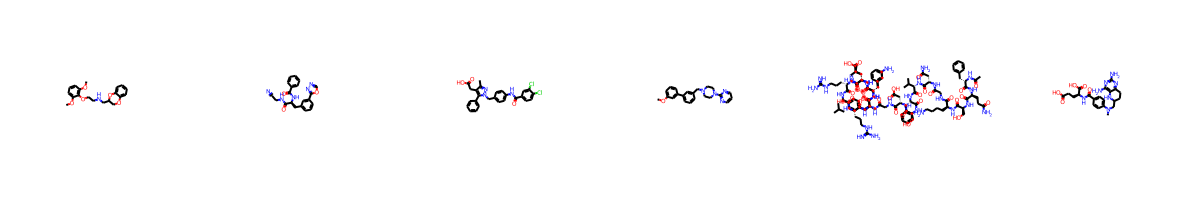

In [6]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in idg_sample.cansmi], molsPerRow=6)

* __DrugCentral__

In [7]:
drugcentral_sample = pd.read_sql("SELECT * FROM drugcentral WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
drugcentral_sample

,id,name,cas_reg_no,smiles,inchikey,inchi,formula,molweight,cansmi,mol_id
0,3714,clobenzepam,1159-93-9,CN(C)CCN1C2=C(NC3=CC=CC=C3C1=O)C=C(Cl)C=C2,IDWVKNARDDZONS-UHFFFAOYSA-N,InChI=1S/C17H18ClN3O/c1-20(2)9-10-21-16-8-7-12...,C17H18ClN3O,315.800,CN(C)CCN1C(=O)c2ccccc2Nc2cc(Cl)ccc21,308407
1,3345,methestrol,130-73-4,CCC(C(CC)C1=CC(C)=C(O)C=C1)C1=CC(C)=C(O)C=C1,PYWBJEDBESDHNP-UHFFFAOYSA-N,InChI=1S/C20H26O2/c1-5-17(15-7-9-19(21)13(3)11...,C20H26O2,298.426,CCC(c1ccc(O)c(C)c1)C(CC)c1ccc(O)c(C)c1,309017
2,965,drostanolone propionate,521-12-0,CCC(=O)O[C@H]1CC[C@H]2[C@@H]3CC[C@H]4CC(=O)[C@...,NOTIQUSPUUHHEH-UXOVVSIBSA-N,InChI=1S/C23H36O3/c1-5-21(25)26-20-9-8-17-16-7...,C23H36O3,360.538,CCC(=O)O[C@H]1CC[C@H]2[C@@H]3CC[C@H]4CC(=O)[C@...,308419
3,4550,fluorodopa (18F),92812-82-3,N[C@@H](CC1=C([18F])C=C(O)C(O)=C1)C(O)=O,PAXWQORCRCBOCU-RPDRGXCHSA-N,InChI=1S/C9H10FNO4/c10-5-3-8(13)7(12)2-4(5)1-6...,C9H10FNO4,214.183,N[C@@H](Cc1cc(O)c(O)cc1[18F])C(=O)O,309607
4,838,dexpanthenol,81-13-0,CC(C)(CO)[C@@H](O)C(=O)NCCCO,SNPLKNRPJHDVJA-ZETCQYMHSA-N,"InChI=1S/C9H19NO4/c1-9(2,6-12)7(13)8(14)10-4-3...",C9H19NO4,205.254,CC(C)(CO)[C@@H](O)C(=O)NCCCO,6451
5,789,decamethonium,156-74-1,C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C,MTCUAOILFDZKCO-UHFFFAOYSA-N,"InChI=1S/C16H38N2/c1-17(2,3)15-13-11-9-7-8-10-...",C16H38N2,258.493,C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C,39757


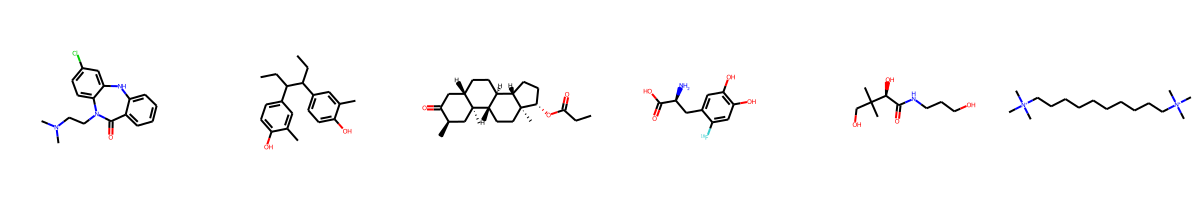

In [8]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in drugcentral_sample.cansmi], molsPerRow=6)

* __LINCS__

In [9]:
lincs_sample = pd.read_sql("SELECT * FROM lincs WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
lincs_sample

,id,pert_name,target,moa,smiles,inchi_key,compound_aliases,sig_count,cansmi,mol_id
0,BRD-K39081386,BRD-K39081386,None,None,COCC(=O)Nc1nnc(s1)-c1ccc(cc1)C(C)(C)C,None,None,3,COCC(=O)Nc1nnc(-c2ccc(C(C)(C)C)cc2)s1,41397
1,BRD-K57181059,BRD-K57181059,None,None,COc1ccc(cc1)S(=O)(=O)N1C[C@@]2(C1)CN([C@@H](CO...,UZBKZSZRCPDHPB-VWLOTQADSA-N,None,4,COc1ccc(S(=O)(=O)N2CC3(CN(C(=O)c4cccnc4)[C@@H]...,25096
2,BRD-K95488294,BRD-K95488294,None,None,C[C@@H](CO)N1C[C@H](C)[C@H](CN(C)C(=O)c2cccc(F...,VIOYSSVCFLGZJY-MHPIHPPYSA-N,None,5,C[C@H]1CN([C@@H](C)CO)S(=O)(=O)c2ccc(C#CC3CC3)...,23598
3,BRD-K62222886,BRD-K62222886,None,None,CC(C)NC(=O)N(C)C[C@H]1Oc2ccc(NC(=O)Cc3cn(C)c4c...,PXCLLIDWELYOMM-UETOGOEVSA-N,None,2,CC(C)NC(=O)N(C)C[C@H]1Oc2ccc(NC(=O)Cc3cn(C)c4c...,31541
4,BRD-K07667635,BRD-K07667635,None,None,C[C@H](CO)N1C[C@@H](C)[C@H](CN(C)C(=O)Nc2ccc(c...,None,None,3,C[C@@H]1CN([C@H](C)CO)C(=O)c2cccc(NC(=O)C3CCOC...,34658
5,BRD-K33832590,BRD-K33832590,None,None,C[C@H](CO)N1C[C@H](C)[C@H](CN(C)C(=O)c2ccc3ccn...,BWTMYHAPSQQINJ-GLDPYIMESA-N,None,3,C[C@H]1CN([C@H](C)CO)C(=O)CCCn2cc(nn2)CO[C@H]1...,30542


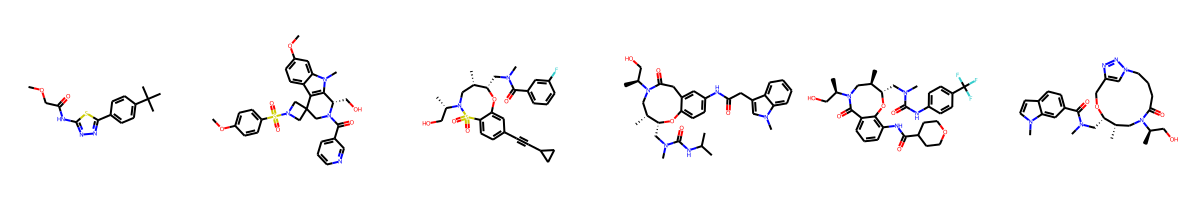

In [10]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in lincs_sample.cansmi], molsPerRow=6)

* __RefMet__

In [11]:
refmet_sample = pd.read_sql("SELECT * FROM refmet WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
refmet_sample

,refmet_name,super_class,main_class,sub_class,formula,exactmass,inchi_key,smiles,pubchem_cid,cansmi,mol_id
0,Glucosylgalactosyl hydroxylysine,Carbohydrates,Disaccharides,Disaccharides,C18H34N2O13,486.20609299999995,UTIRJVJBKWSIOX-SRMFCGEKSA-N,N[C@@H](CCC(CN)O[C@@H]1O[C@H](CO)[C@H](O)[C@H]...,122304,NCC(CC[C@H](N)C(=O)O)O[C@@H]1O[C@H](CO)[C@H](O...,5095
1,Cer 20:0;O3/36:0,Sphingolipids,Ceramides,PhytoCer,C56H113NO4,863.866959,HLBPVXSSEZZNNF-JJEZHPPHSA-N,CCCCCCCCCCCCCCCC[C@@H](O)[C@@H](O)[C@H](CO)NC(...,145715078,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H...,22445
2,Phe-Glu-Asp,Organic acids,Amino acids and peptides,Tripeptides,C18H23N3O8,409.14851699999997,MPFGIYLYWUCSJG-AVGNSLFASA-N,N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCC(O)=O)C(=O)N...,10223202,N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCC(=O)O)C(=O)N...,15672
3,Ala-Lys-His,Organic acids,Amino acids and peptides,Tripeptides,C15H26N6O4,354.201554,OQWQTGBOFPJOIF-DLOVCJGASA-N,C[C@@H](N)C(=O)N[C@H](CCCCN)C(=O)N[C@H](Cc1c[n...,145453626,C[C@@H](N)C(=O)N[C@H](CCCCN)C(=O)N[C@H](Cc1c[n...,10358
4,Ala-Leu-Met,Organic acids,Amino acids and peptides,Tripeptides,C14H27N3O4S,333.172229,OPZJWMJPCNNZNT-DCAQKATOSA-N,CC(C)C[C@@H](NC(=O)[C@@H](C)N)C(=O)N[C@H](CCSC...,145453620,CSCC[C@@H](NC(=O)[C@@H](CC(C)C)NC(=O)[C@@H](C)...,10341
5,2-Hydroxy behenic acid,Fatty Acyls,Fatty acids,Hydroxy FA,C22H44O3,356.329046,RPGJJWLCCOPDAZ-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCCCC(O)C(O)=O,193484,CCCCCCCCCCCCCCCCCCCCC(O)C(=O)O,5955


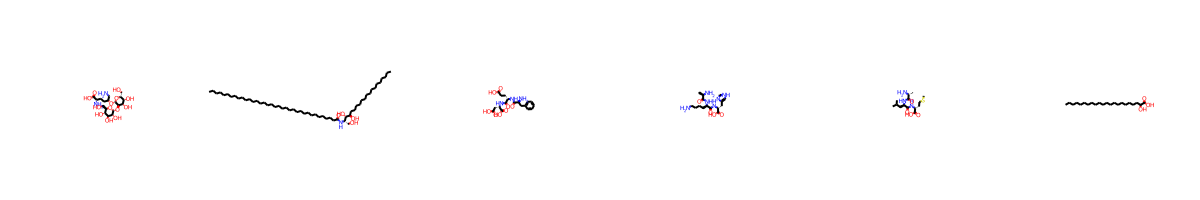

In [12]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in refmet_sample.cansmi], molsPerRow=6)

* __GlyGen__

In [13]:
glygen_sample = pd.read_sql("SELECT * FROM glygen WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
glygen_sample

,glycan_type,mass_pme,number_monosaccharides,fully_determined,wurcs,byonic,glytoucan_ac,missing_score,glycam,inchi,...,smiles,mass,glygen_id,inchi_key,glytoucan_id,pubchem_cid,pubchem_sid,chebi_id,cansmi,mol_id
0,Saccharide,3218.62,13,nan,"WURCS=2.0/6,13,12/[a2122h-1x_1-5_2*NCC/3=O][a2...",Hex(6)HexNAc(5)NeuAc(2) % 2587.915202,G60829NM,53,nan,InChI=1S/C98H161N7O72/c1-23(117)99-45-30(124)8...,...,CC(=O)N[C@@H]1[C@H](C[C@@](O[C@H]1[C@@H]([C@@H...,2587.92,15755,BMWFEQXQYDRIBR-WPEUOOHQSA-N,G60829NM,91849265.0,252280900.0,152238.0,CC(=O)N[C@H]1C(O)O[C@H](CO)[C@@H](O[C@@H]2O[C@...,304438
1,Saccharide,3753.88,15,yes,"WURCS=2.0/6,15,14/[a2122h-1b_1-5_2*NCC/3=O][a1...",Hex(6)HexNAc(5)dHex(1)NeuAc(3) % 3025.0685275,G21459ST,0,DNeup5Aca2-3DGalpb1-4DGlcpNAcb1-2[DNeup5Aca2-3...,InChI=1S/C115H188N8O84/c1-27-61(150)75(164)77(...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)OC[C@@H]2[...,3025.07,2127,UHPGTJHEEJGYKW-AVCAGQRYSA-N,G21459ST,91861069.0,252295003.0,148354.0,CC(=O)N[C@H]1[C@H](O[C@@H]2[C@@H](OC[C@H]3O[C@...,301772
2,Saccharide,1567.81,7,nan,"WURCS=2.0/4,7,6/[a2122h-1x_1-5_2*NCC/3=O][a211...",Hex(3)HexNAc(3)dHex(1) % 1259.46506188,G42113HJ,99,nan,InChI=1S/C48H81N3O35/c1-11-24(61)30(67)32(69)4...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)O[C@@H]2[C...,1259.47,7243,PDKQWDAPXHVWBA-LLJZEPPOSA-N,G42113HJ,91849093.0,252280692.0,150615.0,CC(=O)N[C@H]1C(O)O[C@H](CO)[C@@H](O[C@@H]2O[C@...,307874
3,Saccharide,454.24,2,yes,"WURCS=2.0/2,2,1/[a1122h-1b_1-5][a1122h-1a_1-5]...",Hex(2) % 342.1162117,G09507TI,0,DManpa1-2DManpb1-OH,InChI=1S/C12H22O11/c13-1-3-6(16)8(18)10(11(20)...,...,C([C@@H]1[C@H]([C@@H]([C@@H]([C@@H](O1)O)O[C@@...,342.12,7159,HIWPGCMGAMJNRG-ORZFQWOTSA-N,G09507TI,67702969.0,252279372.0,146997.0,OC[C@H]1O[C@@H](O)[C@@H](O[C@H]2O[C@H](CO)[C@@...,302926
4,Saccharide,1134.61,5,yes,"WURCS=2.0/4,5,4/[h2112h_2*NCC/3=O][a2112h-1b_1...",Hex(2)HexNAc(2)dHex(1)aldi(1) % 896.34851585,G42154JB,0,nan,InChI=1S/C34H60N2O25/c1-9-18(45)23(50)25(52)32...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)O[C@@H]2[C...,896.35,30725,COHSJXUZDFYKKQ-JSXYJKKASA-N,G42154JB,91862304.0,252296483.0,150633.0,CC(=O)N[C@@H](CO)[C@@H](O[C@@H]1O[C@H](CO)[C@H...,303134
5,Saccharide,740.39,3,yes,"WURCS=2.0/2,3,2/[a2122h-1b_1-5_2*NCC/3=O][a211...",Hex(1)HexNAc(2) % 586.22213341,G16971JV,0,DGalpb1-4DGlcpNAcb1-4DGlcpNAcb1-OH,InChI=1S/C22H38N2O16/c1-6(28)23-11-14(31)18(9(...,...,CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1O)CO)O...,586.22,17597,OCPQLCXSCTTXMX-NDHNAMKESA-N,G16971JV,91855883.0,252288790.0,147508.0,CC(=O)N[C@H]1[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O...,304789


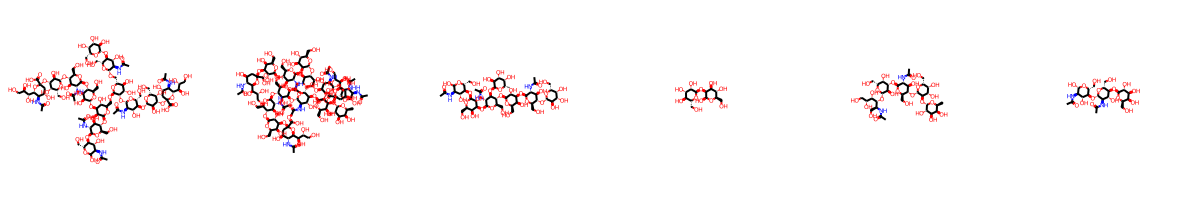

In [14]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in glygen_sample.cansmi], molsPerRow=6)

* __ReproTox__

In [15]:
reprotox_sample = pd.read_sql("SELECT * FROM reprotox WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
reprotox_sample

,ls_id,cas_rn,pubchem_cid,smiles,term,cansmi,mol_id
0,LS-109511,42472-96-8,135339,O=C1N(C2CCCNC2=O)C(=O)c2ccccc12,CV,O=C1NCCCC1N1C(=O)c2ccccc2C1=O,298250
1,LS-263,60-57-1,969491,ClC1=C(Cl)[C@]2(Cl)[C@@H]3[C@@H]4C[C@@H]([C@H]...,CNS,ClC1=C(Cl)[C@]2(Cl)[C@@H]3[C@@H]4C[C@H]([C@@H]...,20630
2,LS-1159,30516-87-1,35370,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,CNS,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,40149
3,LS-205,54-85-3,3767,NNC(=O)c1ccncc1,CNS,NNC(=O)c1ccncc1,13015
4,LS-6321,1806-26-4,15730,CCCCCCCCc1ccc(O)cc1,CNS,CCCCCCCCc1ccc(O)cc1,4913
5,LS-1357,55-86-7,5935,Cl.CN(CCCl)CCCl,Blood,CN(CCCl)CCCl.Cl,298153


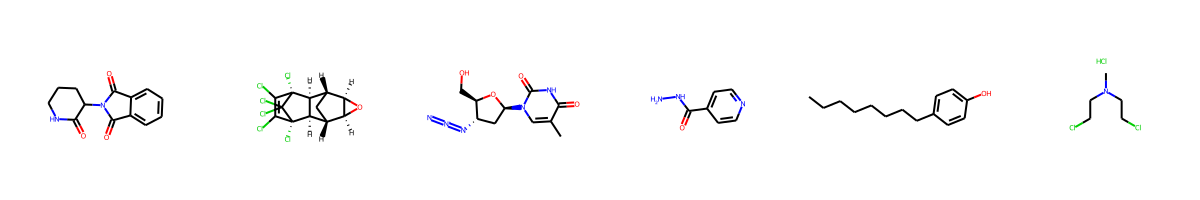

In [16]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in reprotox_sample.cansmi], molsPerRow=6)

### Chemical similarity search

In [17]:
hits = rdktools.db.MolSimilaritySearch("NCCc1cc(O)c(O)cc1", "mols", dbcon)
hits.head(12)

,cansmi,name,tanimoto
0,NCCc1ccc(O)c(O)c1,None,1.000000
1,Cl.NCCc1ccc(O)c(O)c1,None,1.000000
2,NCCc1cc(O)c(O)c(O)c1,None,0.921986
3,NCCc1cccc(O)c1,None,0.853846
4,CC(=O)NCCc1ccc(O)c(O)c1,None,0.817610
5,OCCc1ccc(O)c(O)c1,None,0.784722
6,NCCc1cc(O)c(O)cc1O,None,0.778443
7,Cl.NCCc1cc(O)c(O)cc1O,None,0.778443
8,O=CCc1ccc(O)c(O)c1,None,0.773973
9,Oc1ccc(CCNCCCCCCNCCc2ccccc2)cc1O,None,0.773810


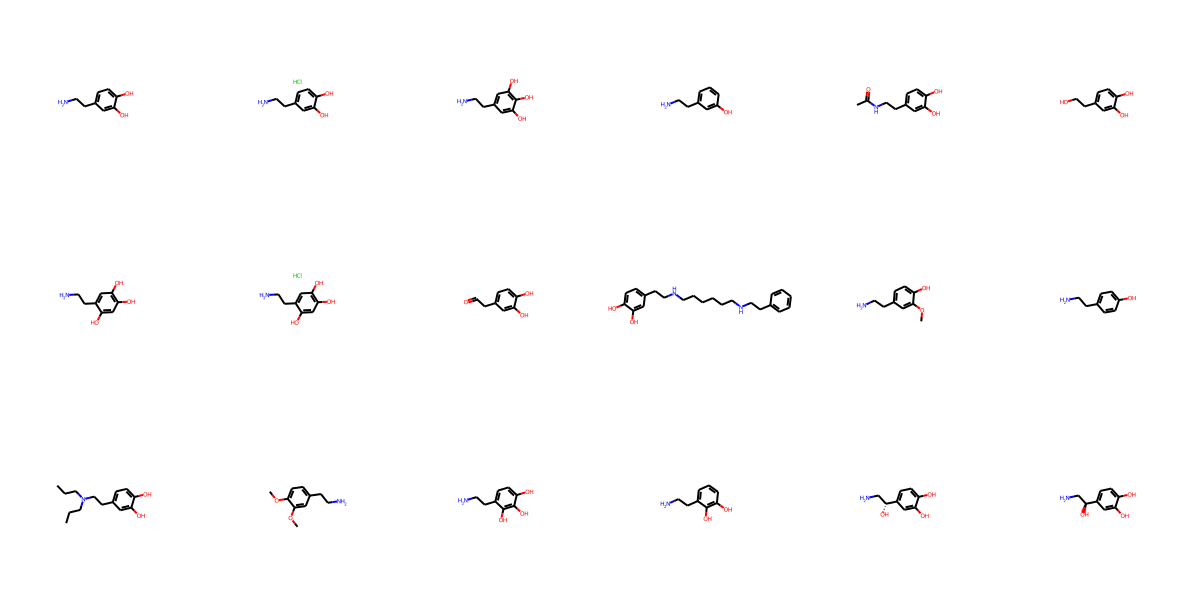

In [18]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in hits.cansmi[:18]], molsPerRow=6)

## Cansmi commonality

Comparing datasets by canonical SMILES.

In [19]:
cansmis={};
for table in ("idg", "drugcentral", "lincs", "glygen", "refmet", "reprotox"):
  cansmis[table] = set(pd.read_sql(f"SELECT DISTINCT cansmi FROM {table} WHERE cansmi IS NOT NULL", dbcon)["cansmi"])
  print(f"{table:>12}: {len(cansmis[table]):6d} cansmis")

         idg: 249512 cansmis
 drugcentral:   4097 cansmis
       lincs:  26821 cansmis
      glygen:   9695 cansmis
      refmet:  23114 cansmis
    reprotox:    698 cansmis


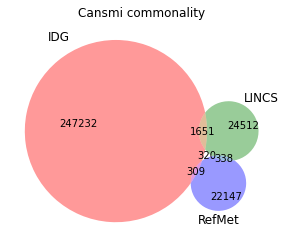

In [20]:
v3 = venn3([cansmis["idg"], cansmis["lincs"], cansmis["refmet"]], ('IDG', 'LINCS', 'RefMet'), set_colors=("r", "g", "b"), alpha=0.4)
plt.title("Cansmi commonality")
plt.show()

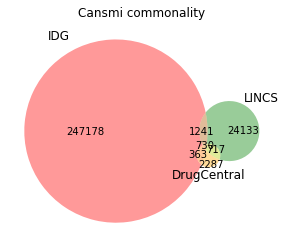

In [21]:
v3 = venn3([cansmis["idg"], cansmis["lincs"], cansmis["drugcentral"]], ('IDG', 'LINCS', 'DrugCentral'), set_colors=("r", "g", "orange"), alpha=0.4)
plt.title("Cansmi commonality")
plt.show()

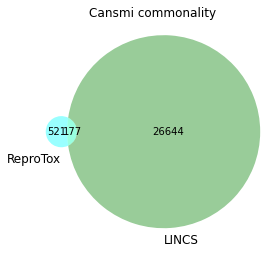

In [22]:
plt.figure(figsize=(8,4))
v2 = venn2([cansmis["reprotox"], cansmis["lincs"]], ('ReproTox', 'LINCS'), set_colors=("cyan", "g"), normalize_to=2)
plt.title("Cansmi commonality")
plt.show()